In [1073]:
from keras.models import Sequential
import matplotlib.pyplot as plt
from PIL import Image
import glob 
import numpy as np 
import cv2
import os
from skimage.transform import resize
from keras.layers import Input
from keras.layers.core import Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.models import Model, load_model
import tensorflow as tf
from keras import backend as K
from PIL import Image

IMG_ORI_WIDTH = 250
IMG_ORI_HEIGHT = 250

<h1>Show Sample Training Image</h1>

sample image:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x250 at 0x1807BB780>
sample image type:  <class 'PIL.JpegImagePlugin.JpegImageFile'>
numpy shape:  (250, 250, 3)


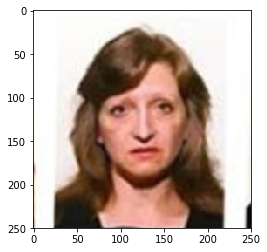

In [1074]:
# using scikit image
im = Image.open('data/training_images/train_img_1.jpg')
print("sample image: ", im)
print("sample image type: ",type(im))
plt.imshow(im)

# after converting it into numpy array
sample_train = np.array(im) # convert to JpegImage to numpy array
print("numpy shape: ", sample_train.shape)

sample image type:  <class 'numpy.ndarray'>
sample image shape:  (250, 250, 3)


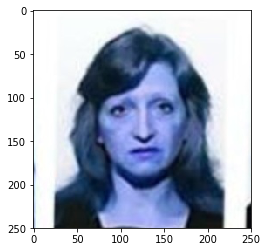

In [1075]:
# Using Opencv2: it reads the image as numpy
imO = cv2.imread('data/training_images/train_img_1.jpg') # store as numpy
print("sample image type: ", type(imO))
print("sample image shape: ", imO.shape)
# OpenCV represents RGB images as multi-dimensional NumPy arrays…but in reverse order!
# So numpy array read by OpenCV is BGR...
plt.imshow(imO)  # Display BGR... no good 

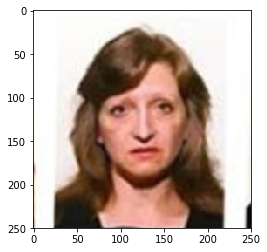

In [1076]:
plt.imshow(cv2.cvtColor(imO, cv2.COLOR_BGR2RGB)) # now RGB! 

<h1>Show Sample Train Mask</h1>
cv2.imread reads a grayscale image as 3 channles (RGB) although it's a grayscale.
So we need to convert it to grayscale again.

sample mask:  <PIL.JpegImagePlugin.JpegImageFile image mode=L size=250x250 at 0x178FB7A20>
sample image type:  <class 'PIL.JpegImagePlugin.JpegImageFile'>
numpy shape:  (250, 250)


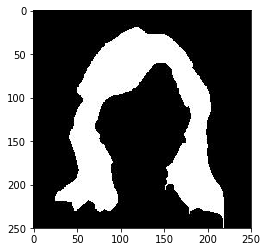

In [1077]:
# using scikit image
sample_mask = Image.open('data/training_masks/train_mask_1.jpg')
print("sample mask: ", sample_mask)
print("sample image type: ",type(sample_mask))
plt.imshow(sample_mask)

# after converting it into numpy array
sample_mask = np.array(sample_mask) # convert to JpegImage to numpy array
print("numpy shape: ", sample_mask.shape)

sample mask type:  <class 'numpy.ndarray'>
sample mask shape:  (250, 250, 3)


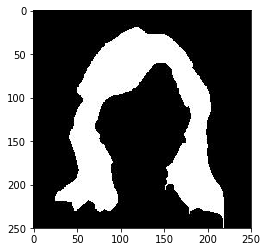

In [1078]:
sample_mask = cv2.imread('data/training_masks/train_mask_1.jpg') # store as numpy
print("sample mask type: ", type(sample_mask))
print("sample mask shape: ", sample_mask.shape)
plt.imshow(sample_mask)

sample mask tpye after converting BGR to Gray type:  <class 'numpy.ndarray'>
sample mask shape after converting BGR to Graysacle shape:  (250, 250)


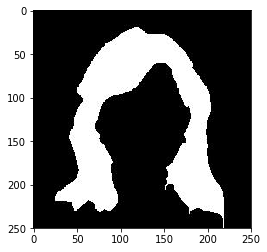

In [1079]:
sample_mask = cv2.cvtColor(sample_mask, cv2.COLOR_BGR2GRAY) # convert BGR to Grayscale
print("sample mask tpye after converting BGR to Gray type: ", type(sample_mask))
print("sample mask shape after converting BGR to Graysacle shape: ", sample_mask.shape)
plt.imshow(sample_mask, cmap='gray')

<h1>Get and Resize Train Images in List</h1>

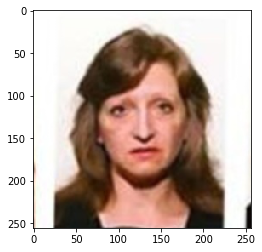

In [1080]:
image_list = []
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS = 3
train_image_path = 'data/training_images/'
for i in range(1, 1501):
    im = cv2.imread(train_image_path + 'train_img_' + str(i) + '.jpg') # read as numpy
    # resize the image to 256 X 256
    im = cv2.resize(im,(IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
    image_list.append(im) # append it to the list 
plt.imshow(cv2.cvtColor(image_list[0], cv2.COLOR_BGR2RGB)) # display the first image

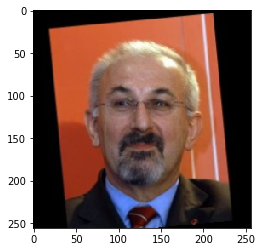

In [1081]:
plt.imshow(cv2.cvtColor(image_list[1499], cv2.COLOR_BGR2RGB)) # display the last image

<h1>Get Image_List Info</h1>

In [1082]:
print("image_list length: ", len(image_list), "; index[0] - index[1499])")
print("lis type: ", type(image_list))
print("each numpy array in list shape: ", image_list[0].shape)

image_list length:  1500 ; index[0] - index[1499])
lis type:  <class 'list'>
each numpy array in list shape:  (256, 256, 3)


<h1>Get and Resize Train Masks in List</h1>

In [1083]:
mask_list = []
IMG_HEIGHT = 256
IMG_WIDTH = 256
train_mask_path = 'data/training_masks/'
for i in range(1, 1501):
    # opencv reads an image as 3 Channles (BGR) although mask is a grayscale image
    im = cv2.imread(train_mask_path + 'train_mask_' + str(i) + '.jpg') # read as numpy
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) # convert BGR to Grayscale
    # resize the image to 256 X 256
    im = cv2.resize(im,(IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
    # expand dimension (256, 256) to (256, 256, 1) to indicate that it has 1 channel for model.fit
    im = np.expand_dims(im, 2) # 2 indicates 3rd dimension
    mask_list.append(im) # append it to the list 

(256, 256, 1)


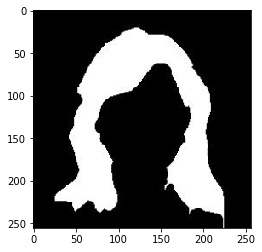

In [1084]:
print (mask_list[0].shape)
# squeeze changes (256, 256, 1) to (256, 256)
# plt. imshow accepts Parameters: (n, m) or (n, m, 3) or (n, m, 4)
# So it does not accpet (n, m, 1)
plt.imshow( np.squeeze(mask_list[0]),cmap='gray' ) # display the first image

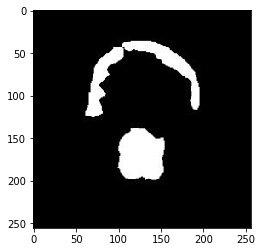

In [1085]:
plt.imshow(np.squeeze(mask_list[1499]), cmap='gray') # display the last image

<h1>Get Mask_List Info</h1>
<p>Mask is a grayscale image. It only has 1 channel</p>

In [1086]:
print("mask_list length: ", len(mask_list), "; index[0] - index[1499])")
print("mask_list type: ", type(mask_list))
print("each numpy array in list shape: ", mask_list[0].shape)

mask_list length:  1500 ; index[0] - index[1499])
mask_list type:  <class 'list'>
each numpy array in list shape:  (256, 256, 1)


<h1>Add Validaion Data to Train Data</h1>
<p>It is easier to just slipt train data to validation data than manage train set and validation set. If you want to use validation set separately for model.fit, you need to do do model.fit(validation_data = (x_val , y_val) ) # tuple of x val and y val</p>

In [1087]:
# adding images
val_img_path = 'data/validation_images/'
for i in range(1, 501):
    im = cv2.imread(val_img_path + 'validation_img_' + str(i) + '.jpg') # read as numpy
    # resize the image to 256 X 256
    im = cv2.resize(im,(IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
    image_list.append(im) # append it to the list 

# adding masks
val_mask_path = 'data/validation_masks/'
for i in range(1, 501):
    im = cv2.imread(val_mask_path + 'validation_mask_' + str(i) + '.jpg') # read as numpy
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) # convert BGR to Grayscale
    # resize the image to 256 X 256
    im = cv2.resize(im,(IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
    # expand dimension (256, 256) to (256, 256, 1) to indicate that it has 1 channel for model.fit
    im = np.expand_dims(im, 2) # 2 indicates 3rd dimension
    mask_list.append(im) # append it to the list 

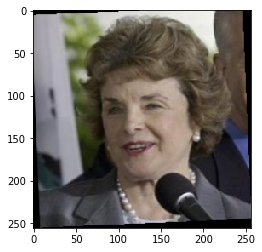

In [1088]:
# Display the first validation image
plt.imshow(cv2.cvtColor(image_list[1500], cv2.COLOR_BGR2RGB)) # display the first image

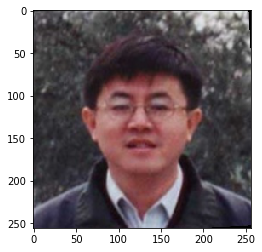

In [1089]:
# Display the last validation image
plt.imshow(cv2.cvtColor(image_list[1999] , cv2.COLOR_BGR2RGB)) # display the first image

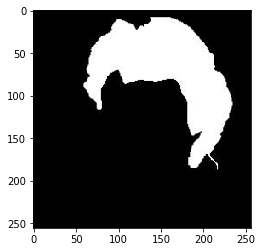

In [1090]:
# Display the first validation mask
plt.imshow(np.squeeze(mask_list[1500]), cmap='gray') # display the last image

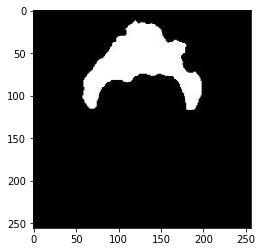

In [1091]:
# Display the last validation mask
plt.imshow(np.squeeze(mask_list[1999]), cmap='gray') # display the last image

<h1>Get And Resize test images</h1>

In [1092]:
test_list = []
test_image_path = 'data/testing_images/'
for i in range(1, 928):
    im = cv2.imread(test_image_path + 'test_img_' + str(i) + '.jpg') # read as numpy
    # resize the image to 256 X 256
    im = cv2.resize(im,(IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
    test_list.append(im) # append it to the list 

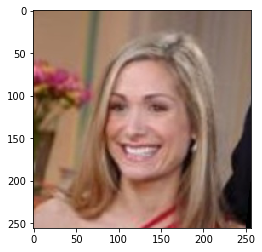

In [1093]:
# Display the first test image
plt.imshow(cv2.cvtColor(test_list[0], cv2.COLOR_BGR2RGB)) # display the first image

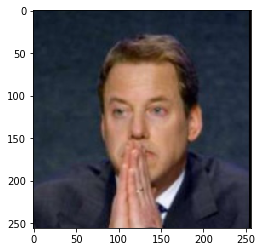

In [1094]:
# Display the last teset image
plt.imshow(cv2.cvtColor(test_list[926], cv2.COLOR_BGR2RGB)) # display the first image

<h1>Create Keras Metric</h1>
<p>It's used for the loss function. It's a customized loss function kind of</p>

In [1095]:
def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec), axis=0)

<h1>Build U-Net Model</h1>

In [1096]:
# Build U-Net Model
def get_unet():
    # Build U-Net model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = Lambda(lambda x: x / 255) (inputs)

    c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (s)
    c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
    p1 = MaxPooling2D((2, 2)) (c1)

    c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
    c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
    p2 = MaxPooling2D((2, 2)) (c2)

    c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
    c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
    p3 = MaxPooling2D((2, 2)) (c3)

    c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
    c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

    c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (p4)
    c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (c5)

    u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
    c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

    u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
    c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

    u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
    c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

    u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
    c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[mean_iou])
    model.summary()
    return model

In [1097]:
# Get Model
model = get_unet()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
lambda_18 (Lambda)              (None, 256, 256, 3)  0           input_19[0][0]                   
__________________________________________________________________________________________________
conv2d_288 (Conv2D)             (None, 256, 256, 8)  224         lambda_18[0][0]                  
__________________________________________________________________________________________________
conv2d_289 (Conv2D)             (None, 256, 256, 8)  584         conv2d_288[0][0]                 
__________________________________________________________________________________________________
max_poolin

In [1098]:
# Before fitting a model. Transform the image list into numpy array
image_list = np.array(image_list)
print("image list:" , image_list.shape)

image list: (2000, 256, 256, 3)


In [1099]:
# Before fitting a model. Transform the mask list into numpy array
mask_list = np.array(mask_list)
print("mask list:" , mask_list.shape)

mask list: (2000, 256, 256, 1)


In [1100]:
# Fit model
model.fit(image_list,mask_list,validation_split=0.2,epochs=2,batch_size=256,verbose=2)

In [1101]:
# Predict on test
preds_test = model.predict(image_list)

# Threshold predictions
preds_test_t = (preds_test > 0.5).astype(np.uint8)

In [1102]:
# Create list of upsampled test masks
preds_test_upsampled = []
for i in range(len(preds_test_upsampled)):
    # resize the images (256, 256) back to (250, 250) which is the original size of the training masks
    im = cv2.resize(preds_test_upsampled[i], (IMG_ORI_HEIGHT, IMG_ORI_WIDTH), interpolation = cv2.INTER_AREA)
    # change dimension (n, m, 1) to (n, m) which is the original dimension, just simple gray scale
    # before fitting (n,m) was transformed to (n,m,1) for model.fit function to indicate it's a grayscale image
    im = np.squeeze(im)
    # append it to the list
    preds_test_upsampled.append(im) # append it to the list 

In [1110]:
# Save the test masks into a folder
for i in range(len(preds_test_upsampled)):
    im = Image.fromarray(preds_test_upsampled[i])
    im.save("data/saveMasks/" + str(i+1) + ".jpg") # i + 1 because the first file name is test_mask_1.jpg